In [ ]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML

from hyperfit.linfit import LinFit

In [2]:
df = pd.read_csv('SMBH_Data_0303.csv',header=1)

In [3]:
paras=['log_sigma0','log_B/T','logRho_soi_approx_new']

paras.append('M_BH')
stds=[]
for para in paras:
    stds.append(para+'_std')
    
df_=df[paras+stds].dropna(axis='index',how='any')

normalization=np.median(10**df_[paras],axis=0)[:-1]
normalization=np.log10(normalization)
xs=np.array(df_[paras]).transpose()
errs=np.array(df_[stds]).transpose()
cov=np.zeros((len(paras),len(paras),len(df_)))

for i in range(len(normalization)):
    xs[i]=xs[i]-normalization[i]
    
for i in range(len(paras)):
    cov[i,i,:]=errs[i]**2


In [4]:
normalization

array([ 2.2771162 , -0.35953965,  2.77884623])

In [18]:
normalization.sum()+3.32060273

8.017025510950333

In [16]:
10**normalization

array([1.89285000e+02, 4.36978787e-01, 6.00960915e+02])

In [5]:
w = 1/errs[-1]**2
model = PySRRegressor(
            binary_operators=["+", "-", "*", "/"],
            precision=64,
        )
X=xs[:-1].transpose()
y=xs[-1]
model.fit(X=X.transpose(), y=y, weights=w)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 1.770e+04
Head worker occupation: 90.3%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 86 / 600 total iterations (14.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           8.910e-01  -1.000e-10  8.14901319516396
3           4.812e-01  3.080e-01  (x1 + 8.23881984939505)
5           1.741e-01  5.084e-01  ((x0 + 1.5460460630364972) / 0.18677884720635154)
9           1.330e-01  6.733e-02  ((x1 - ((x2 * 0.52014515512662) - x0)) - -8.235311020761564)
11          6.621e-02  3.487e-01  (((x1 - (x2 * 0.52014515512662)) + (x0 * 2.81108541384743)) - -8.235311020761564)
13          6.188e-02  3.383e-02  (((x0 * 2.814769445104858) - ((x2 * 0.42813587369474143) + -6.661169412408039)) - (-1.601716131221296 - x1))
19          6.039e-02  4.069e-03  ((((x0 * x0) + (x2 * 0.5844008597436072)) + x1) - (-8.238780418377264 - (((x0 * -1.20

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                   8.14901319516396   
	1         0.307991                            (x1 + 8.23881984939505)   
	2         0.508763     ((x0 * 5.287695603825985) + 8.270979218228176)   
	3         0.152053  (((x0 / 0.26957766067066746) + x1) - -8.324383...   
	4         0.007599  (((x1 - (x2 / 1.5795993330637255)) - -8.201467...   
	5   >>>>  0.350543  (((x1 - (x2 / 2.1944618399678206)) - -8.235311...   
	6         0.006604  (((x0 * 2.814769445104858) - ((x2 * 0.42813587...   
	7         0.025590  (((x1 - (x2 / ((0.30137128365054 - x1) + 2.056...   
	8         0.009621  (((x1 - (x2 / (((x1 * x1) - x1) + 2.1944618399...   
	9         0.028218  (((x1 - (x2 / (((x0 / (x2 + x2)) - x1) + 2.187...   
	10        0.014580  (((x1 - (x2 / ((((x0 / (x2 + x2)) - -0.1541151...   
	
	        loss  complexity  
	0   0.891005           1  
	1   0.481241           3

In [8]:
def rmse(y,y_pred,w):
    return np.sqrt(np.average((y-y_pred)**2,weights=w))

print('Eq. selected rmse:',rmse(y,model.predict(X),w))
display(model.sympy())
    
for i in range(len(model.equations_)):
    print('Eq.',i,'rmse:',rmse(y,model.predict(X,index=i),w))
    display(model.sympy(index=i))

Eq. selected rmse: 0.25041096701950705


2.7426194364975364*x0 + x1 - 0.45569259022278734*x2 + 8.235311020761564

Eq. 0 rmse: 0.9439306997500191


8.14901319516396

Eq. 1 rmse: 0.6937151263478758


x1 + 8.23881984939505

Eq. 2 rmse: 0.4170884256852229


5.287695603825985*x0 + 8.270979218228176

Eq. 3 rmse: 0.35825518216683194


3.7095061864998565*x0 + x1 + 8.324383343840505

Eq. 4 rmse: 0.3555431889091052


x0 + x1 - 0.63307193100698604*x2 + 8.201467675568956

Eq. 5 rmse: 0.25041096701950705


2.7426194364975364*x0 + x1 - 0.45569259022278734*x2 + 8.235311020761564

Eq. 6 rmse: 0.2487627247031809


2.814769445104858*x0 + x1 - 0.42813587369474143*x2 + 8.262885543629335

Eq. 7 rmse: 0.2424776960428815


2.7438193639492992*x0 + x1 - x2/(2.357690917075989 - x1) + 8.235311020761564

Eq. 8 rmse: 0.24015603895488147


2.719267567983839*x0 + x1 - x2/(x1**2 - x1 + 2.1944618399678206) + 8.235311020761564

Eq. 9 rmse: 0.23347398759987054


2.482935378386317*x0 + x1 - x2/(x0/(2*x2) - x1 + 2.187914055592247) + 8.222310361089427

Eq. 10 rmse: 0.2300947251664599


2.768333228176993*x0 + x1 - x2/(x0/(2*x2) - x1 + 2.3479483080732584) + 8.222310362136232

In [11]:
bounds = ((2.0, 3.0), (0.0, 1.0), (-1.0, 0.0), (7.0, 9.0), (1.0e-5, 1.0))
hf = LinFit(xs, cov)

mcmc_samples, mcmc_lnlike = hf.emcee(bounds, verbose=True)
print(np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1))

 message: Optimization terminated successfully.
 success: True
     fun: -207.7989974864629
       x: [-2.021e+00 -5.724e-01  1.714e-01  5.833e-01  4.108e-02]
     nit: 110
    nfev: 8385
     jac: [-7.435e-03  5.385e-02  7.824e-03  7.492e+01 -2.902e-02]


  0%|                                                  | 0/1000 [00:00<?, ?it/s]/home/zj448/miniconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1609.51it/s]


Niterations/Max Iterations:  1000 / 100000
Integrated ACT/Min Convergence Iterations:  [40.97790914 50.3572384  41.56010014 43.90696186 53.1825317 ] / 2659.1265850963828


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1619.43it/s]


Niterations/Max Iterations:  2000 / 100000
Integrated ACT/Min Convergence Iterations:  [47.84417164 49.80440152 52.01298239 60.03896231 52.93319414] / 3001.9481153258366


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1627.66it/s]


Niterations/Max Iterations:  3000 / 100000
Integrated ACT/Min Convergence Iterations:  [60.08772512 56.88272467 60.34995888 66.68468905 57.07345447] / 3334.2344524772516


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1602.55it/s]


Niterations/Max Iterations:  4000 / 100000
Integrated ACT/Min Convergence Iterations:  [70.45541943 59.51866956 56.38167477 76.60188118 69.48621708] / 3830.0940591865005


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1619.11it/s]


Niterations/Max Iterations:  5000 / 100000
Integrated ACT/Min Convergence Iterations:  [73.24411957 64.98402276 57.55522649 76.94232306 78.44630489] / 3922.3152444271805


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1614.77it/s]


Niterations/Max Iterations:  6000 / 100000
Integrated ACT/Min Convergence Iterations:  [82.54216755 65.26331166 57.96372313 79.12967105 65.66386409] / 4127.108377295032


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1612.18it/s]


Niterations/Max Iterations:  7000 / 100000
Integrated ACT/Min Convergence Iterations:  [74.00214036 66.46910448 61.0436482  78.87211882 57.99079742] / 3943.6059409006907


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1626.15it/s]


Niterations/Max Iterations:  8000 / 100000
Integrated ACT/Min Convergence Iterations:  [72.4442787  61.3778316  60.99118179 79.41439791 58.54143732] / 3970.7198953334882


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1621.66it/s]


Niterations/Max Iterations:  9000 / 100000
Integrated ACT/Min Convergence Iterations:  [73.18059135 59.35881959 63.76193662 82.01665192 57.01922458] / 4100.832595861864
[ 3.41032627  0.99876554 -0.2990787   8.1962883   0.1415967 ] [0.0552344  0.10043203 0.03832975 0.03500594 0.07194335]


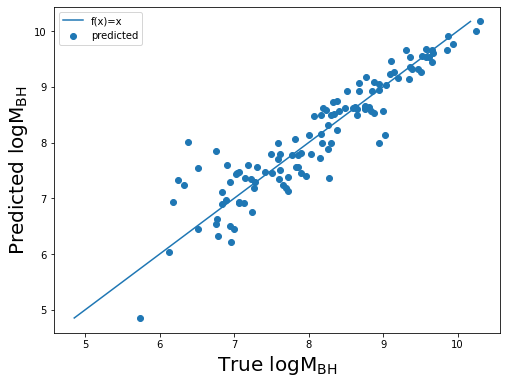

In [12]:
c=np.mean(mcmc_samples, axis=1)
y=xs[-1]
y_pred=0
for i in range(len(c)-2):
    y_pred+=c[i]*xs[i]
y_pred+=c[-2]

plt.figure(figsize=(8,6))
plt.scatter(y,y_pred,label='predicted')
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),label='f(x)=x')
plt.xlabel(r'True $\rm{log} M_{BH}$',fontsize=20)
plt.ylabel(r'Predicted $\rm{log} M_{BH}$',fontsize=20)
plt.legend()
plt.show()

In [13]:
print('rmse:',np.sqrt(np.average((y-y_pred)**2,weights=w)))

rmse: 0.2813755577121205


In [19]:
bounds = ((2.7, 2.8), (1.1, 1.2), (-0.4, -0.3), (7.9, 8.1), (1.0e-5, 1.0))
hf = LinFit(xs, cov)

mcmc_samples, mcmc_lnlike = hf.emcee(bounds, verbose=True)
print(np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1))

 message: Optimization terminated successfully.
 success: True
     fun: -193.92111963036828
       x: [-2.202e+00 -8.511e-01  2.408e-01  7.567e-01  2.385e-02]
     nit: 70
    nfev: 5373
     jac: [-6.736e-03 -6.292e+00  2.001e-03  7.211e+01 -1.320e-02]


  0%|                                                  | 0/1000 [00:00<?, ?it/s]/home/zj448/miniconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1591.85it/s]


Niterations/Max Iterations:  1000 / 100000
Integrated ACT/Min Convergence Iterations:  [48.94978416 61.23126625 54.06958986 52.29594653 49.6256034 ] / 3061.5633126903067


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1599.35it/s]


Niterations/Max Iterations:  2000 / 100000
Integrated ACT/Min Convergence Iterations:  [52.75605635 58.6811563  61.38271879 53.96191907 63.34728823] / 3167.3644116987666


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 911.96it/s]


Niterations/Max Iterations:  3000 / 100000
Integrated ACT/Min Convergence Iterations:  [69.14554985 66.90617539 86.9728476  72.3604076  75.09701673] / 4348.642379955652


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 927.53it/s]


Niterations/Max Iterations:  4000 / 100000
Integrated ACT/Min Convergence Iterations:  [77.96372846 68.78654478 87.92712829 75.34112602 85.18851472] / 4396.356414378669


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1493.39it/s]


Niterations/Max Iterations:  5000 / 100000
Integrated ACT/Min Convergence Iterations:  [92.78122706 71.99272368 82.94737227 86.90364155 80.41116002] / 4639.06135308789


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1602.46it/s]


Niterations/Max Iterations:  6000 / 100000
Integrated ACT/Min Convergence Iterations:  [106.16433748  78.57752352  83.54628541 102.18721587  85.47177082] / 5308.216873973709


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 852.18it/s]


Niterations/Max Iterations:  7000 / 100000
Integrated ACT/Min Convergence Iterations:  [90.42651271 83.05487872 81.98862916 89.96089173 82.96801999] / 4521.32563529066


100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 986.12it/s]


Niterations/Max Iterations:  8000 / 100000
Integrated ACT/Min Convergence Iterations:  [96.12761234 83.19562177 77.18353877 93.75291456 80.13892403] / 4806.3806171903725


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1601.65it/s]


Niterations/Max Iterations:  9000 / 100000
Integrated ACT/Min Convergence Iterations:  [ 93.87526069  85.40585628  84.97219394 102.20967472  85.18233002] / 5110.483735958836


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1614.45it/s]


Niterations/Max Iterations:  10000 / 100000
Integrated ACT/Min Convergence Iterations:  [ 95.34688599  87.56680684  87.19109569 101.1372878   81.46272584] / 5056.864389867342
[ 2.85425535  1.16151575 -0.3337952   8.20260696  0.08668111] [0.03487247 0.04581018 0.02570283 0.03600486 0.05704124]


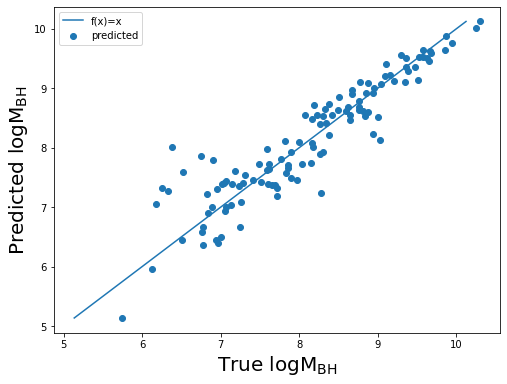

In [20]:
c=np.mean(mcmc_samples, axis=1)
y=xs[-1]
y_pred=0
for i in range(len(c)-2):
    y_pred+=c[i]*xs[i]
y_pred+=c[-2]

plt.figure(figsize=(8,6))
plt.scatter(y,y_pred,label='predicted')
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),label='f(x)=x')
plt.xlabel(r'True $\rm{log} M_{BH}$',fontsize=20)
plt.ylabel(r'Predicted $\rm{log} M_{BH}$',fontsize=20)
plt.legend()
plt.show()

In [ ]:
def plot_relation(paras,relation,obs=pd.read_csv('SMBH_Data_0303.csv',header=1)):
    

In [ ]:
obs = pd.read_csv('SMBH_Data_0303.csv',header=1)
paras=['log_sigma0','log_B/T','logRho_soi_approx_new','M_BH']
obs = obs[paras].dropna(axis='index',how='any')
obs